In [1]:
import pandas as pd

path = r"D:\Academic_docs\Sem-8\Petrophysics\tutorial\ChalkData_ClassTutorial.xlsx"
db = pd.read_excel(path, skiprows=5)  #skipping the header
df=pd.DataFrame(db)  #converting into Tabular Dataframe
df=df.dropna(subset=["Porosity  "])  #including rows upto where porosity is defined
print(df.columns) 

Index(['Well', 'Formation', 'TVD', 'TVD.1', 'Overpressure', 'Porosity  ',
       'Kgas', 'Gr.Den.', 'Dry Blk. Den', 'Sat. Blk. Den', 'Dry Ver. Vp',
       'Dry Ver.Vs ', 'Wet Ver. Vp', 'Wet Ver. Vs', 'Carb', 'Q', 'Cl',
       'Unnamed: 17', 'Sp. Surface', 'Clay Mineral', 'Texture',
       'Agg. Min. Bulk', 'Agg. Min. Sh.', 'Dry Blk. Mod', 'Dry Sh. Mod',
       'Dry Blk Mod (Min)', 'Dry Sh Mod (Min)', 'PR (dry)',
       'Dry Shear Mod (PR)', 'Sat Blk. Mod', 'Sat Sh. Mod', 'PR(sat)',
       'Gass. Dry Bulk', 'Gass. Dry Shear', 'Gass. Blk Mod (Msrd. Dry)',
       'Gass. Blk Mod (Gass. Dry)', 'Gass. Vp', 'Gass. (Vp/Vs)',
       'Biot's Coeff.', 'OB Press.', 'Pore Press', 'Eff. Pres. (Terzagi)',
       'Eff.Pres. (Biot)', 'Vp/Vs', 'Vp/Vs.1', 'Li&Downton', 'Castagna',
       'Li&Downton.1', 'Castagna.1'],
      dtype='object')


In [2]:
# Calculate Grain Density by using mineral fraction data
Carb=(df["Carb"].iloc[1:])/100
Q=(df["Q"].iloc[1:])/100
Cl=(df["Cl"].iloc[1:])/100
# Constants are used from the Header
Rho_Grain=(Carb*2.710+Q*2.650+Cl*2.800)
print(Rho_Grain)


1      2.70874
2      2.70933
3      2.70979
4      2.70975
5      2.70983
        ...   
98     2.74764
99     2.76119
100    2.73891
101    2.73409
102     2.7633
Length: 102, dtype: object


In [3]:
# calculate Porosity using calculated Rho_grain
import numpy as np
Porosity_Cal=(Rho_Grain-df["Sat. Blk. Den"].iloc[1:])/(Rho_Grain-1)
Porosity_Cal=np.where(Porosity_Cal>=0,Porosity_Cal,np.nan)  #replace the negative porosity with NaN
Porosity=(df["Porosity  "].iloc[1:])/100  #But we will use the given porosity throughout this work
print(Porosity)

1       0.33
2       0.26
3       0.26
4       0.27
5       0.26
       ...  
98     0.297
99     0.315
100    0.288
101    0.323
102    0.317
Name: Porosity  , Length: 102, dtype: object


In [4]:
#Calculate Dry Bulk Modulus and Shear Modulus
Rho_dry=(df["Dry Blk. Den"].iloc[1:])
Vp_dry=df["Dry Ver. Vp"].iloc[1:]
Vs_dry=df["Dry Ver.Vs "].iloc[1:]
K_Dry=Rho_dry*((Vp_dry)**2-(4/3)*(Vs_dry)**2)  #in GPa
G_Dry=Rho_dry*((Vs_dry)**2) #in GPa
print(G_Dry)
 

1      5.995263
2      8.568194
3        9.3312
4      9.496278
5      9.596192
         ...   
98     7.318747
99     6.284859
100     7.71808
101    6.010562
102    6.334808
Length: 102, dtype: object


In [5]:
# Calculate Voigt Modulus, Reuss Modulus and VRH Modulus for K_matrix
K_Voigt=Carb*71+Q*36.6+Cl*75
K_Reuss=1/(Carb/71+Q/36.6+Cl/75)
K_VRH=(K_Voigt+K_Reuss)/2 #K_matrix=K_mineral=K_VRH
print(K_VRH)

1      67.109984
2      68.885084
3      70.325057
4      70.197776
5      70.452743
         ...    
98     70.063411
99     70.075137
100    69.573042
101      70.0533
102    69.598929
Length: 102, dtype: object


In [6]:
#Calculate Sat Bulk Modulus and Shear Modulus using Gassman's Point prediction Method
Biot_Coeff=(1-K_Dry/K_VRH)
K_Sat=K_Dry+((Biot_Coeff**2)/((Porosity/2.25-Porosity/K_VRH)+Biot_Coeff/K_VRH))
G_Sat=G_Dry
print(K_Sat)

1       12.32734
2      16.567013
3      17.667894
4      18.432206
5      19.866922
         ...    
98     14.439061
99     12.121795
100    15.046431
101    12.155871
102    13.063632
Length: 102, dtype: object


Text(0.5, 1.0, 'Porosity vs Modulus')

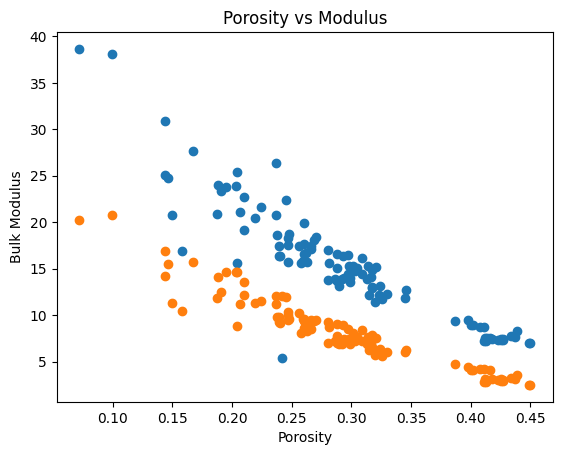

In [7]:
import matplotlib.pyplot as plt

plt.scatter(Porosity,K_Sat)
plt.scatter(Porosity,G_Sat)
plt.xlabel("Porosity")
plt.ylabel("Bulk Modulus")
plt.title("Porosity vs Modulus")
#plt.legend(loc='best')

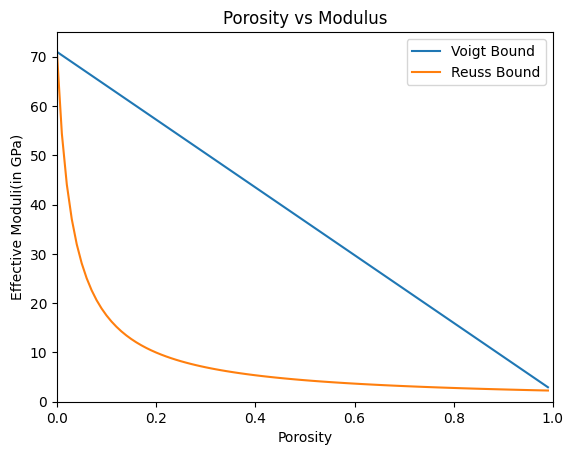

In [8]:
# Voigt and Reuss Bounds using Dominant minerals
import numpy as np
por=np.arange(0,1,0.01)  #Porosity values ranging [0:1] with a step of 0.01

K_VB=por*2.25+(1-por)*71            #Composite Voigt Upper Bound using Dominant minerals for K
K_RB=(por/2.25+(1-por)/71)**(-1)    #Composite Reuss Lower Bound using Dominant minerals for K
G_VB=(1-por)*30     #Composite Voigt Upper Bound using Dominant minerals for G
G_RB=0*por          #Composite Reuss Lower Bound using Dominant minerals for G
K_VRHB=(K_VB+K_RB)/2 #To be used in Hassian-Shritkman's Bound
G_VRHB=(G_VB+G_RB)/2 #To be used in Hassian-Shritkman's Bound

plt.plot(por,K_VB,label='Voigt Bound')
plt.plot(por,K_RB,label='Reuss Bound')
plt.xlim(0,1)
plt.ylim(0,75)
plt.xlabel("Porosity")
plt.ylabel("Effective Moduli(in GPa)")
plt.title("Porosity vs Modulus")
plt.legend(loc='best')


In [9]:
# calculate Sat and Dry Poissons Ratio

Poisson_R_Dry=(3*K_Dry-2*G_Dry)/(2*(3*K_Dry+G_Dry))
Poisson_R_Sat=(3*K_Sat-2*G_Sat)/(2*(3*K_Sat+G_Sat))


In [10]:
# Calculate Biot's Coefficient using PHIC=50%
Biot_Coeff_Critical=Porosity/0.5

In [11]:
# Stress Calculation
VOP=1*df["TVD.1"].iloc[1:] #Vertical Overburden Pressure in Psi
PP=0.45*df["TVD.1"].iloc[1:] #Pore Pressure in Psi
Diff_Pressure=VOP-PP #Differential or Terzhag's Pressure
EFF_Pressure=VOP-Biot_Coeff*PP #Effective Pressure
print(EFF_Pressure)


1      4141.138213
2      4313.810648
3      4445.775167
4      4534.093138
5      4603.554271
          ...     
98             NaN
99             NaN
100            NaN
101            NaN
102            NaN
Length: 102, dtype: object


In [12]:
# Vp and Vs Sat and dry from Gassman's Output

Rho_Sat=df["Sat. Blk. Den"].iloc[1:]
Vp_Sat_Gassman=((K_Sat+(4/3)*G_Sat)/Rho_Sat)**0.5
Vp_Dry_Gassman=((K_Dry+(4/3)*G_Dry)/Rho_dry)**0.5

Vs_Sat_Gassman=((G_Sat)/Rho_Sat)**0.5
Vs_Dry_Gassman=((G_Dry)/Rho_dry)**0.5


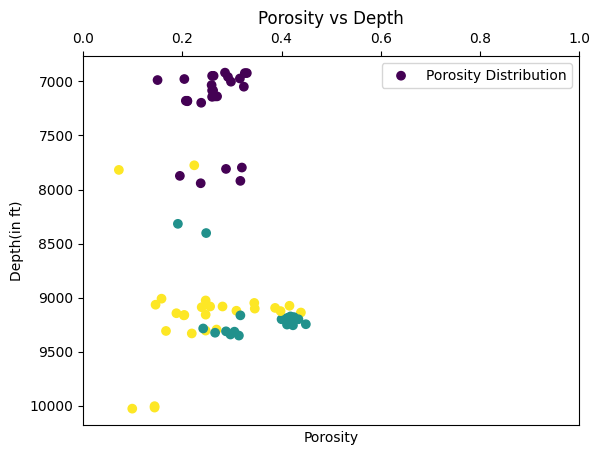

In [13]:
# Plot Porosity trend vs Depth
color_bar=df["Formation"].iloc[1:]
color_bar[color_bar=="chalk"]=1
color_bar[color_bar=="Tor"]=2
color_bar[color_bar=="Ekofisk"]=3
plt.scatter(Porosity,df["TVD.1"].iloc[1:],c=color_bar,cmap='viridis',label='Porosity Distribution')
plt.xlim(0,1)
plt.ylabel("Depth(in ft)")
plt.xlabel("Porosity")
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.title("Porosity vs Depth")
plt.legend(loc='best')

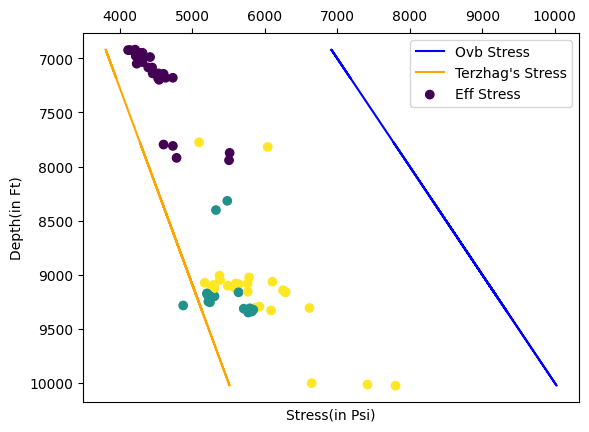

In [14]:
# plot stress trend with Depth
plt.plot(VOP,df["TVD.1"].iloc[1:],color='blue',label='Ovb Stress')
plt.plot(Diff_Pressure,df["TVD.1"].iloc[1:],color='orange',label="Terzhag's Stress")
plt.scatter(EFF_Pressure,df["TVD.1"].iloc[1:],c=color_bar,cmap='viridis',label='Eff Stress')
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xlabel("Stress(in Psi)")
plt.ylabel("Depth(in Ft)")
plt.legend(loc='best')


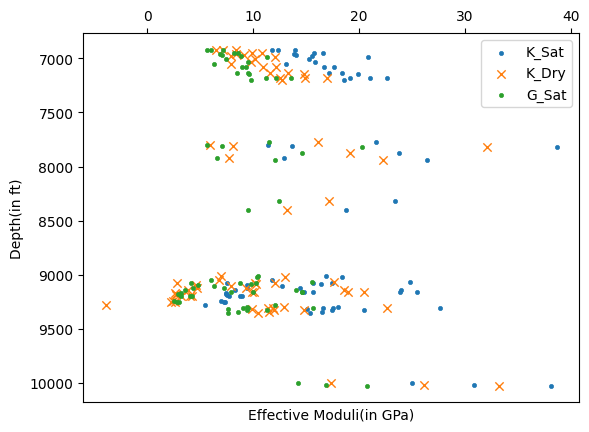

In [15]:
# Effective Moduli vs Depth

plt.scatter(K_Sat,df["TVD.1"].iloc[1:],label='K_Sat',linewidths=0.5,marker='.')
plt.scatter(K_Dry,df["TVD.1"].iloc[1:],label='K_Dry',linewidths=1,marker='x')
plt.scatter(G_Sat,df["TVD.1"].iloc[1:],label='G_Sat',linewidths=0.5,marker='.')
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xlabel("Effective Moduli(in GPa)")
plt.ylabel("Depth(in ft)")
plt.legend(loc='best')



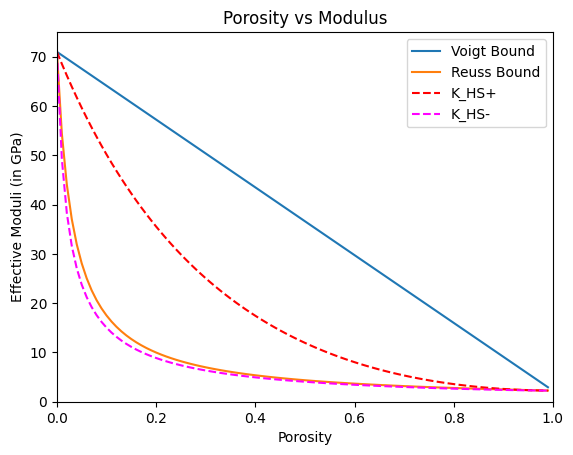

In [16]:
# V-R Bounds and Hassian Shritkman Bounds

plt.plot(por,K_VB,label='Voigt Bound')
plt.plot(por,K_RB,label='Reuss Bound')
plt.xlim(0,1)
plt.ylim(0,75)
plt.xlabel("Porosity")
plt.ylabel("Effective Moduli (in GPa)")
plt.title("Porosity vs Modulus")


K_HS_U=K_VB+(por/((2.25-K_VB)**(-1)+(1-por)*(K_VB+(4/3)*G_VB)**(-1)))
K_HS_L=2.25+(1-por)/((K_VRHB-2.25)**(-1)+por*(2.25)**(-1))
plt.plot(por,K_HS_U,linestyle='--',color='red',label='K_HS+')
plt.plot(por,K_HS_L,linestyle='--',color='magenta',label='K_HS-')
plt.legend(loc='best')

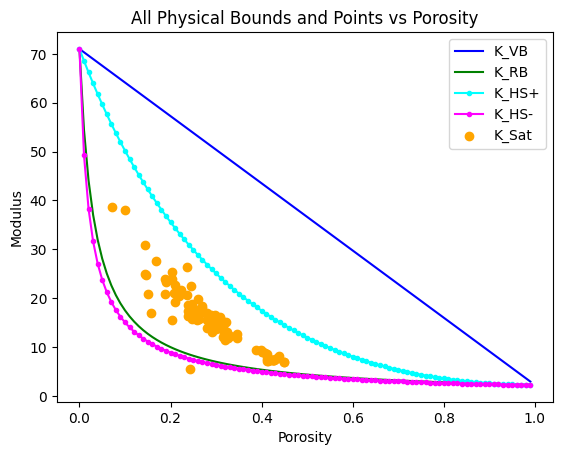

In [17]:
# All Bounds and Points

plt.plot(por,K_VB,color='blue',linestyle='-',label='K_VB')
plt.plot(por,K_RB,color='green',linestyle='-',label='K_RB')
plt.plot(por,K_HS_U,color='cyan',linestyle='-',marker='.',label='K_HS+')
plt.plot(por,K_HS_L,color='magenta',linestyle='-',marker='.',label='K_HS-')
plt.scatter(Porosity,K_Sat,color='orange',label='K_Sat')
plt.xlabel("Porosity")
plt.ylabel("Modulus")
plt.title("All Physical Bounds and Points vs Porosity")
plt.legend(loc='best')

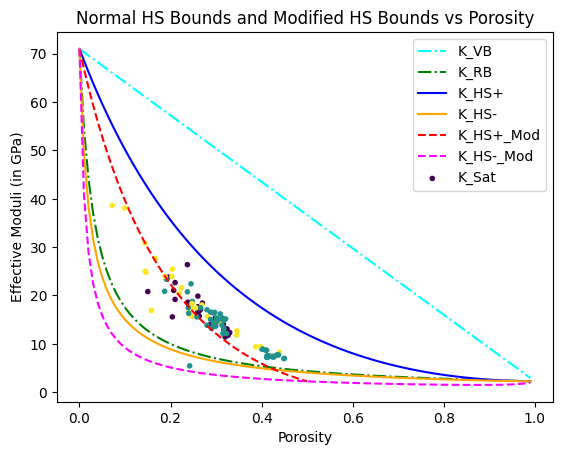

In [18]:
# Modified Hassian-Shritkman and Core Data
por_critical=0.50  #critical porosity = 50% is asked
por_new=por/por_critical
K_HS_U_Mod=K_VB+por_new/((2.25-K_VB)**(-1)+(1-por_new)*(K_VB+(4/3)*G_VB)**(-1))
K_HS_L_Mod=2.25+(1-por_new)/((K_VRHB-2.25)**(-1)+por_new*(2.25)**(-1))
plt.plot(por,K_VB,color='cyan',linestyle='-.',label='K_VB')
plt.plot(por,K_RB,color='green',linestyle='-.',label='K_RB')
plt.plot(por,K_HS_U,color='blue',linestyle='-',label='K_HS+')
plt.plot(por,K_HS_L,color='orange',linestyle='-',label='K_HS-')
plt.plot(por[por<=0.5],K_HS_U_Mod[por<=0.5],color='red',linestyle='--',label='K_HS+_Mod')
plt.plot(por,K_HS_L_Mod,color='magenta',linestyle='--',label='K_HS-_Mod')
color_bar=df["Formation"].iloc[1:]
color_bar[color_bar=="chalk"]=1
color_bar[color_bar=="Tor"]=2
color_bar[color_bar=="Ekofisk"]=3
plt.scatter(Porosity,K_Sat,c=color_bar,cmap='viridis',marker='.',linewidths=1,label='K_Sat')
plt.xlabel("Porosity")
plt.ylabel("Effective Moduli (in GPa)")
plt.title("All Physical Effective Model Bounds vs Porosity ")
plt.title("Normal HS Bounds and Modified HS Bounds vs Porosity")
plt.legend(loc='best')

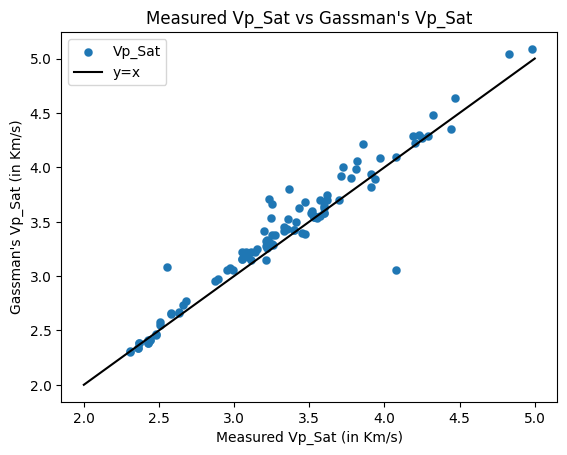

In [19]:
# Measured Sat and Gassman's Sat Vp and Vs
plt.scatter(df["Wet Ver. Vp"].iloc[1:],Vp_Sat_Gassman,label='Vp_Sat',linewidths=0.1)
plt.xlabel("Measured Vp_Sat (in Km/s)")
plt.ylabel("Gassman's Vp_Sat (in Km/s)")
plt.title("Measured Vp_Sat vs Gassman's Vp_Sat")

x=np.arange(2,6,1)
plt.plot(x,x,label='y=x',color='black')
plt.legend(loc='best')


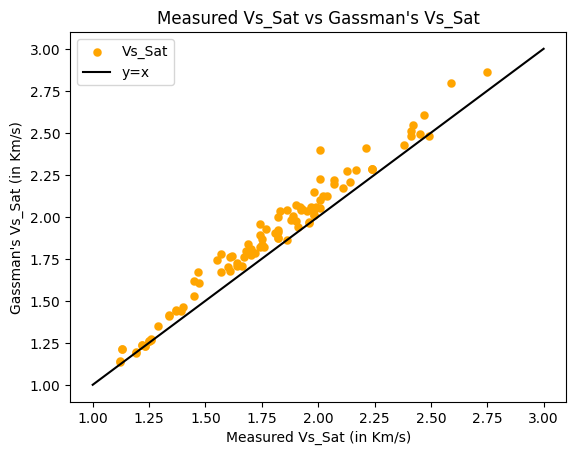

In [20]:
# Measured Sat and Gassman's Sat Vs
plt.scatter(df["Wet Ver. Vs"].iloc[1:],Vs_Sat_Gassman,color='orange',label='Vs_Sat',linewidths=0.1)
plt.xlabel("Measured Vs_Sat (in Km/s)")
plt.ylabel("Gassman's Vs_Sat (in Km/s)")
plt.title("Measured Vs_Sat vs Gassman's Vs_Sat")

y=np.arange(1,4,1)
plt.plot(y,y,label='y=x',color='black')
plt.legend(loc='best')

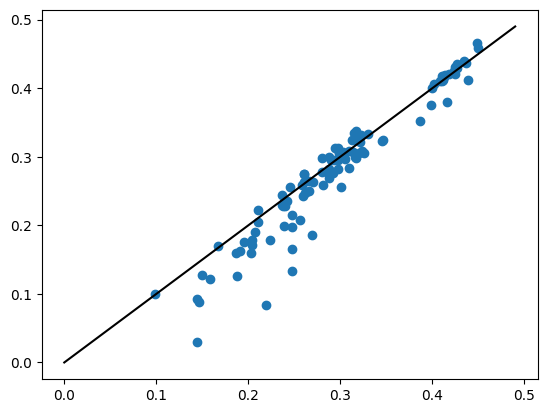

In [21]:
plt.scatter((df["Porosity  "].iloc[1:])/100,Porosity_Cal)
x=np.arange(0,0.5,0.01)
plt.plot(x,x,color='black')